In [1]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import tangram as tg 
import numpy as np 

In [2]:
dataFolder='input_vizgen_liver/'

ad_spatial=sc.read(dataFolder+'Blank_genes_removed.csv').transpose()
ad_spatial.var_names_make_unique()
print(ad_spatial.shape) 


(395215, 347)


In [5]:
adata=sc.read_h5ad(dataFolder+'saveall_with_normalization')

In [3]:
coordinates = pd.read_csv(dataFolder+"tissue_positions_list.csv", index_col=0,header=None)
#counts = sc.read_csv("./pnas.1912459116.sd12.csv").transpose()
#adata_merfish = counts[coordinates.index, :]
ad_spatial.obsm["spatial"] = coordinates.to_numpy()


In [6]:
ad_spatial.obsm['X_pca']=adata.obsm['X_pca']
ad_spatial.obsm['X_umap']=adata.obsm['X_umap']
ad_spatial.uns['leiden']=adata.uns['leiden']
ad_spatial.uns['louvain']=adata.uns['louvain']
ad_spatial.uns['pca']=adata.uns['pca']
ad_spatial.uns['umap']=adata.uns['umap']
ad_spatial.obs['louvain']=adata.obs['louvain']
ad_spatial.obs['leiden']=adata.obs['leiden']


In [7]:
#load the already clusterd and cell type name file 

cluster= pd.read_csv(dataFolder+'leiden_cluster.dat',sep=',',index_col=0,header=0)
cluster=cluster.to_numpy()
ctname=pd.read_csv(dataFolder+'NameOfCT.dat',sep='\t',index_col=0,header=None)
ctname=ctname.to_numpy()
new_cluster_names=ctname[:,0]

ad_spatial.obs['knownClusters'] = cluster.astype(str)


print('ct name',new_cluster_names)

ct name ['Hep1' 'Hep2' 'Hep3' 'Hep4' 'Hep5' 'Hep6' 'LSEC1' 'Kupffer1'
 'DC_Monocytes' 'Hep7' 'Hep8' 'Stroma1' 'Hep9' 'LSEC2' 'Kupffer2' 'AEC'
 'EC_Stroma' 'Stroma2' 'Tcel_ILC' 'Chola1' 'DC' 'Chola2' 'Neutro' 'Hep10'
 'Macrop']


In [10]:
#it takes very long time to run so already saved one read in adata and copied into ad_spatial 

'''
sc.pp.normalize_total(ad_spatial, inplace=True)
sc.pp.log1p(ad_spatial)

sc.pp.pca(ad_spatial)
sc.pp.neighbors(ad_spatial)
sc.tl.umap(ad_spatial)
sc.tl.leiden(ad_spatial, resolution=1.5)
#sc.tl.louvain(ad_spatial,resolution=1.5)
ad_spatial.write_h5ad(dataFolder+'saveall')
'''

"\nsc.pp.normalize_total(ad_spatial, inplace=True)\nsc.pp.log1p(ad_spatial)\n\nsc.pp.pca(ad_spatial)\nsc.pp.neighbors(ad_spatial)\nsc.tl.umap(ad_spatial)\nsc.tl.leiden(ad_spatial, resolution=1.5)\n#sc.tl.louvain(ad_spatial,resolution=1.5)\nad_spatial.write_h5ad(dataFolder+'saveall')\n"

/Users/agrawal/miniconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'knownClusters' as categorical


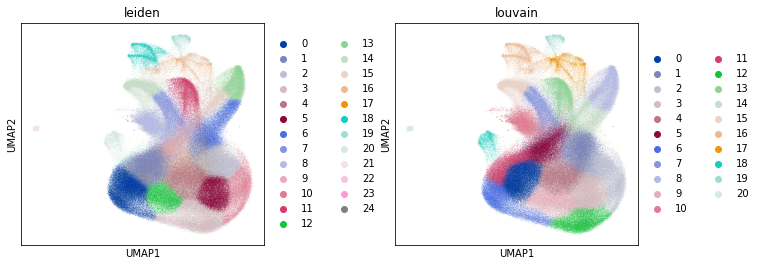

In [11]:
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(ad_spatial, color=["leiden","louvain"], wspace=0.4,show=True, save='_spatial_leiden_louvain.png')

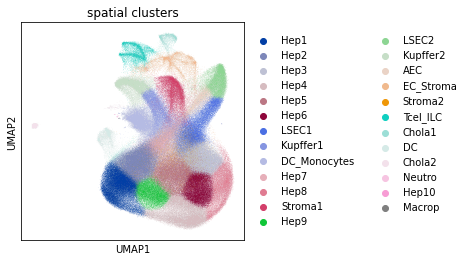

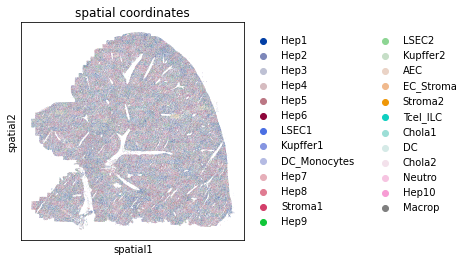

In [12]:
ad_spatial.obs['knownClusters']=  ad_spatial.obs['knownClusters'].astype('category')
ad_spatial.obs['knownClusters'] = ad_spatial.obs['knownClusters'].cat.rename_categories(new_cluster_names)

sc.pl.umap(ad_spatial, color="knownClusters",title='spatial clusters',show=True,save='_spatial_known_clusters.png')
sc.pl.embedding(ad_spatial, basis="spatial", color="knownClusters",title='spatial coordinates')

In [33]:
genename_spatial=ad_spatial.var_names.to_numpy()
genesum=np.sum(ad_spatial.X,axis=0)
genemean=np.mean(ad_spatial.X,axis=0)

index=np.argsort(-genesum)
#Top 20 gene sorted according to their mean expression in spatial data 
for i in range(300):
    print(genename_spatial[index[i]],genemean[index[i]])

Fasn 3.0790968
Pck1 2.7326698
Acsl1 2.6437929
Serping1 2.54817
Cebpa 2.2755053
Sardh 2.2081528
Cald1 2.0652628
Errfi1 2.0385263
Epas1 1.9929379
Aldh7a1 1.9450785
Alas1 1.8778632
Egfr 1.874218
Akr1a1 1.7636348
Comt 1.7633717
Proz 1.706199
Eif3a 1.6903691
Pabpc1 1.6797504
Ldha 1.6560023
Gpd1 1.6532954
Hc 1.6445658
Cyp2c23 1.5828005
Cyp2b9 1.5696424
Psap 1.5513295
Acss2 1.5411335
Cxcl12 1.5150381
Aldh3a2 1.4748077
Ugt2a3 1.4478939
Abcb4 1.4317707
G6pc 1.4299922
Gm2a 1.4086746
Cyp1a2 1.4016154
Tpi1 1.389381
Igf1 1.3749619
Tkt 1.3052133
Gnai2 1.2870911
Sdc1 1.2858353
Pgm1 1.2754942
Gck 1.2754546
Acaca 1.2039205
Psmd3 1.2018435
Akr1d1 1.1962993
Hsd17b2 1.1859636
Lsr 1.1594014
Tmem56 1.1494498
Hsd17b12 1.1256409
Hsd17b6 1.1074395
Gpi1 1.1062768
H2afy 1.0974545
Acacb 1.0807168
Fech 1.0643547
Csnk1a1 1.0278683
Pdha1 0.95814353
Ugt2b1 0.9560762
Eng 0.9018221
Ctsc 0.8924029
Acsl5 0.8838818
Grn 0.85451514
Galm 0.7848568
Dnase1l3 0.7588652
Pgam1 0.7570521
Nrp1 0.75450814
Mertk 0.7412852
Hsd17b7 0.7

In [16]:
np.sort(genename_spatial)

array(['1700061G19Rik', 'Abcb4', 'Acaca', 'Acacb', 'Ace', 'Acsbg1',
       'Acsbg2', 'Acsf3', 'Acsl1', 'Acsl4', 'Acsl5', 'Acsl6', 'Acss1',
       'Acss2', 'Adgre1', 'Adh4', 'Adh7', 'Adpgk', 'Akap14', 'Akr1a1',
       'Akr1c18', 'Akr1d1', 'Alas1', 'Alas2', 'Alcam', 'Aldh1b1',
       'Aldh3a1', 'Aldh3a2', 'Aldh3b1', 'Aldh3b2', 'Aldh3b3', 'Aldh7a1',
       'Aldoart1', 'Aldoart2', 'Aldoc', 'Ammecr1', 'Angpt1', 'Angpt2',
       'Apobec3', 'Aqp1', 'Arsb', 'Axin2', 'B4galt6', 'Bank1', 'Bcam',
       'Bmp2', 'Bmp5', 'Bmp7', 'Bpgm', 'Calcrl', 'Cald1', 'Cav2', 'Cbr4',
       'Ccr1', 'Ccr2', 'Cd177', 'Cd300lg', 'Cd34', 'Cd44', 'Cd48', 'Cd83',
       'Cd93', 'Cdh11', 'Cdh5', 'Cebpa', 'Celsr2', 'Chodl', 'Clec14a',
       'Cnp', 'Col1a2', 'Col6a1', 'Comt', 'Csf1r', 'Csf3r', 'Csk',
       'Csnk1a1', 'Cspg4', 'Ctnnal1', 'Ctsc', 'Cxadr', 'Cxcl12', 'Cxcl14',
       'Cxcr2', 'Cybb', 'Cygb', 'Cyp11a1', 'Cyp11b1', 'Cyp17a1', 'Cyp1a1',
       'Cyp1a2', 'Cyp21a1', 'Cyp2b19', 'Cyp2b23', 'Cyp2b9', 'Cyp2c23',
 

In [19]:
new_cluster_names

array(['Hep1', 'Hep2', 'Hep3', 'Hep4', 'Hep5', 'Hep6', 'LSEC1',
       'Kupffer1', 'DC_Monocytes', 'Hep7', 'Hep8', 'Stroma1', 'Hep9',
       'LSEC2', 'Kupffer2', 'AEC', 'EC_Stroma', 'Stroma2', 'Tcel_ILC',
       'Chola1', 'DC', 'Chola2', 'Neutro', 'Hep10', 'Macrop'],
      dtype=object)

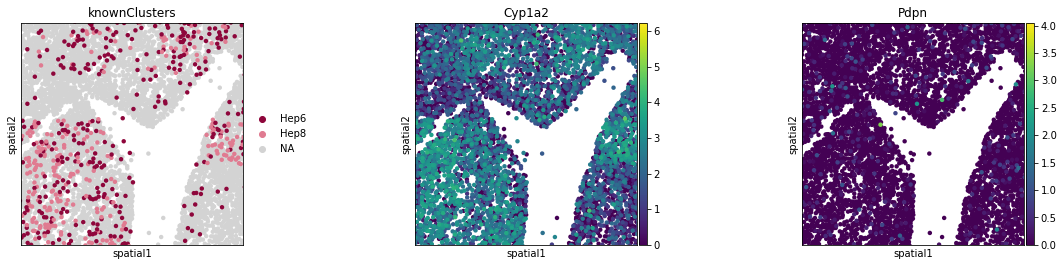

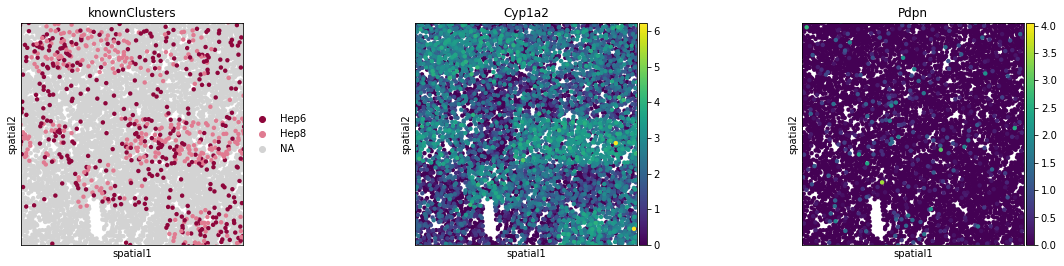

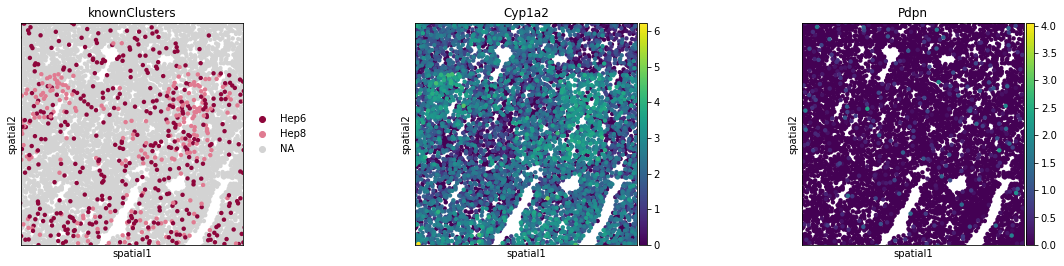

KeyboardInterrupt: 

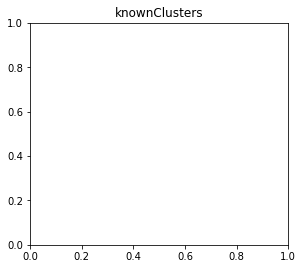

In [45]:
#plot genes and cell types on spatial data 
celltype=["Hep6", "Hep8"]
gene=["Cyp1a2","Pdpn"]
# crop coordinate (left, right, top, bottom)


#spatial_key = "spatial"
#library_id = "tissue42"
#adata.uns[spatial_key] = {library_id: {}}
#adata.uns[spatial_key][library_id]["images"] = {}
#adata.uns[spatial_key][library_id]["images"] = {"hires": image}
#adata.uns[spatial_key][library_id]["scalefactors"] = {"tissue_hires_scalef": 1, "spot_diameter_fullres": 0.5}


#sc.pl.embedding(ad_spatial, basis='spatial',wspace=0.5,color=["knownClusters", gene[0],gene[1] ],groups=celltype)
sc.pl.spatial(ad_spatial, basis='spatial',wspace=0.5,color=["knownClusters", gene[0],gene[1] ],
                crop_coord=[4000, 5000, 5000, 4000],spot_size=20,groups=celltype)

sc.pl.spatial(ad_spatial, basis='spatial',wspace=0.5,color=["knownClusters", gene[0],gene[1] ],
                crop_coord=[5000, 6000, 5000, 4000],spot_size=20,groups=celltype)

sc.pl.spatial(ad_spatial, basis='spatial',wspace=0.5,color=["knownClusters", gene[0],gene[1] ],
                crop_coord=[6000, 7000, 5000, 4000],spot_size=20,groups=celltype)


sc.pl.spatial(ad_spatial, basis='spatial',wspace=0.5,color=["knownClusters", gene[0],gene[1] ],
                crop_coord=[4000, 5000, 4000, 3000],spot_size=20,groups=celltype)

sc.pl.spatial(ad_spatial, basis='spatial',wspace=0.5,color=["knownClusters", gene[0],gene[1] ],
                crop_coord=[5000, 6000, 4000, 3000],spot_size=20,groups=celltype)

sc.pl.spatial(ad_spatial, basis='spatial',wspace=0.5,color=["knownClusters", gene[0],gene[1] ],
                crop_coord=[6000, 7000, 4000, 3000],spot_size=20,groups=celltype)



sc.pl.spatial(ad_spatial, basis='spatial',wspace=0.5,color=["knownClusters", gene[0],gene[1] ],
                crop_coord=[4000, 5000, 8000, 7000],spot_size=20,groups=celltype)
#sc.pl.umap(ad_spatial, color=["knownClusters", gene[0],gene[1] ],wspace=0.4,show=True,vmax=1,groups=celltype)

In [53]:
gene=["Lyve1","Stab2","Cd34","Bcam","Pdpn","Alcam","Eng","Gfap","Hgf","Icam1","Jag1","Pdgfra",'Pecam1',"Plvap",
     "Vcam1","Vwf","Wnt2","Aqp1","Bmp2","Cdh5","Cebpa","Efnb2","Cygb",'Ltbp4', 'Kdr', 'Gpr182','Dll4', 'Dnase1l3', ]
print(len(gene),len(set(gene)))


28 28


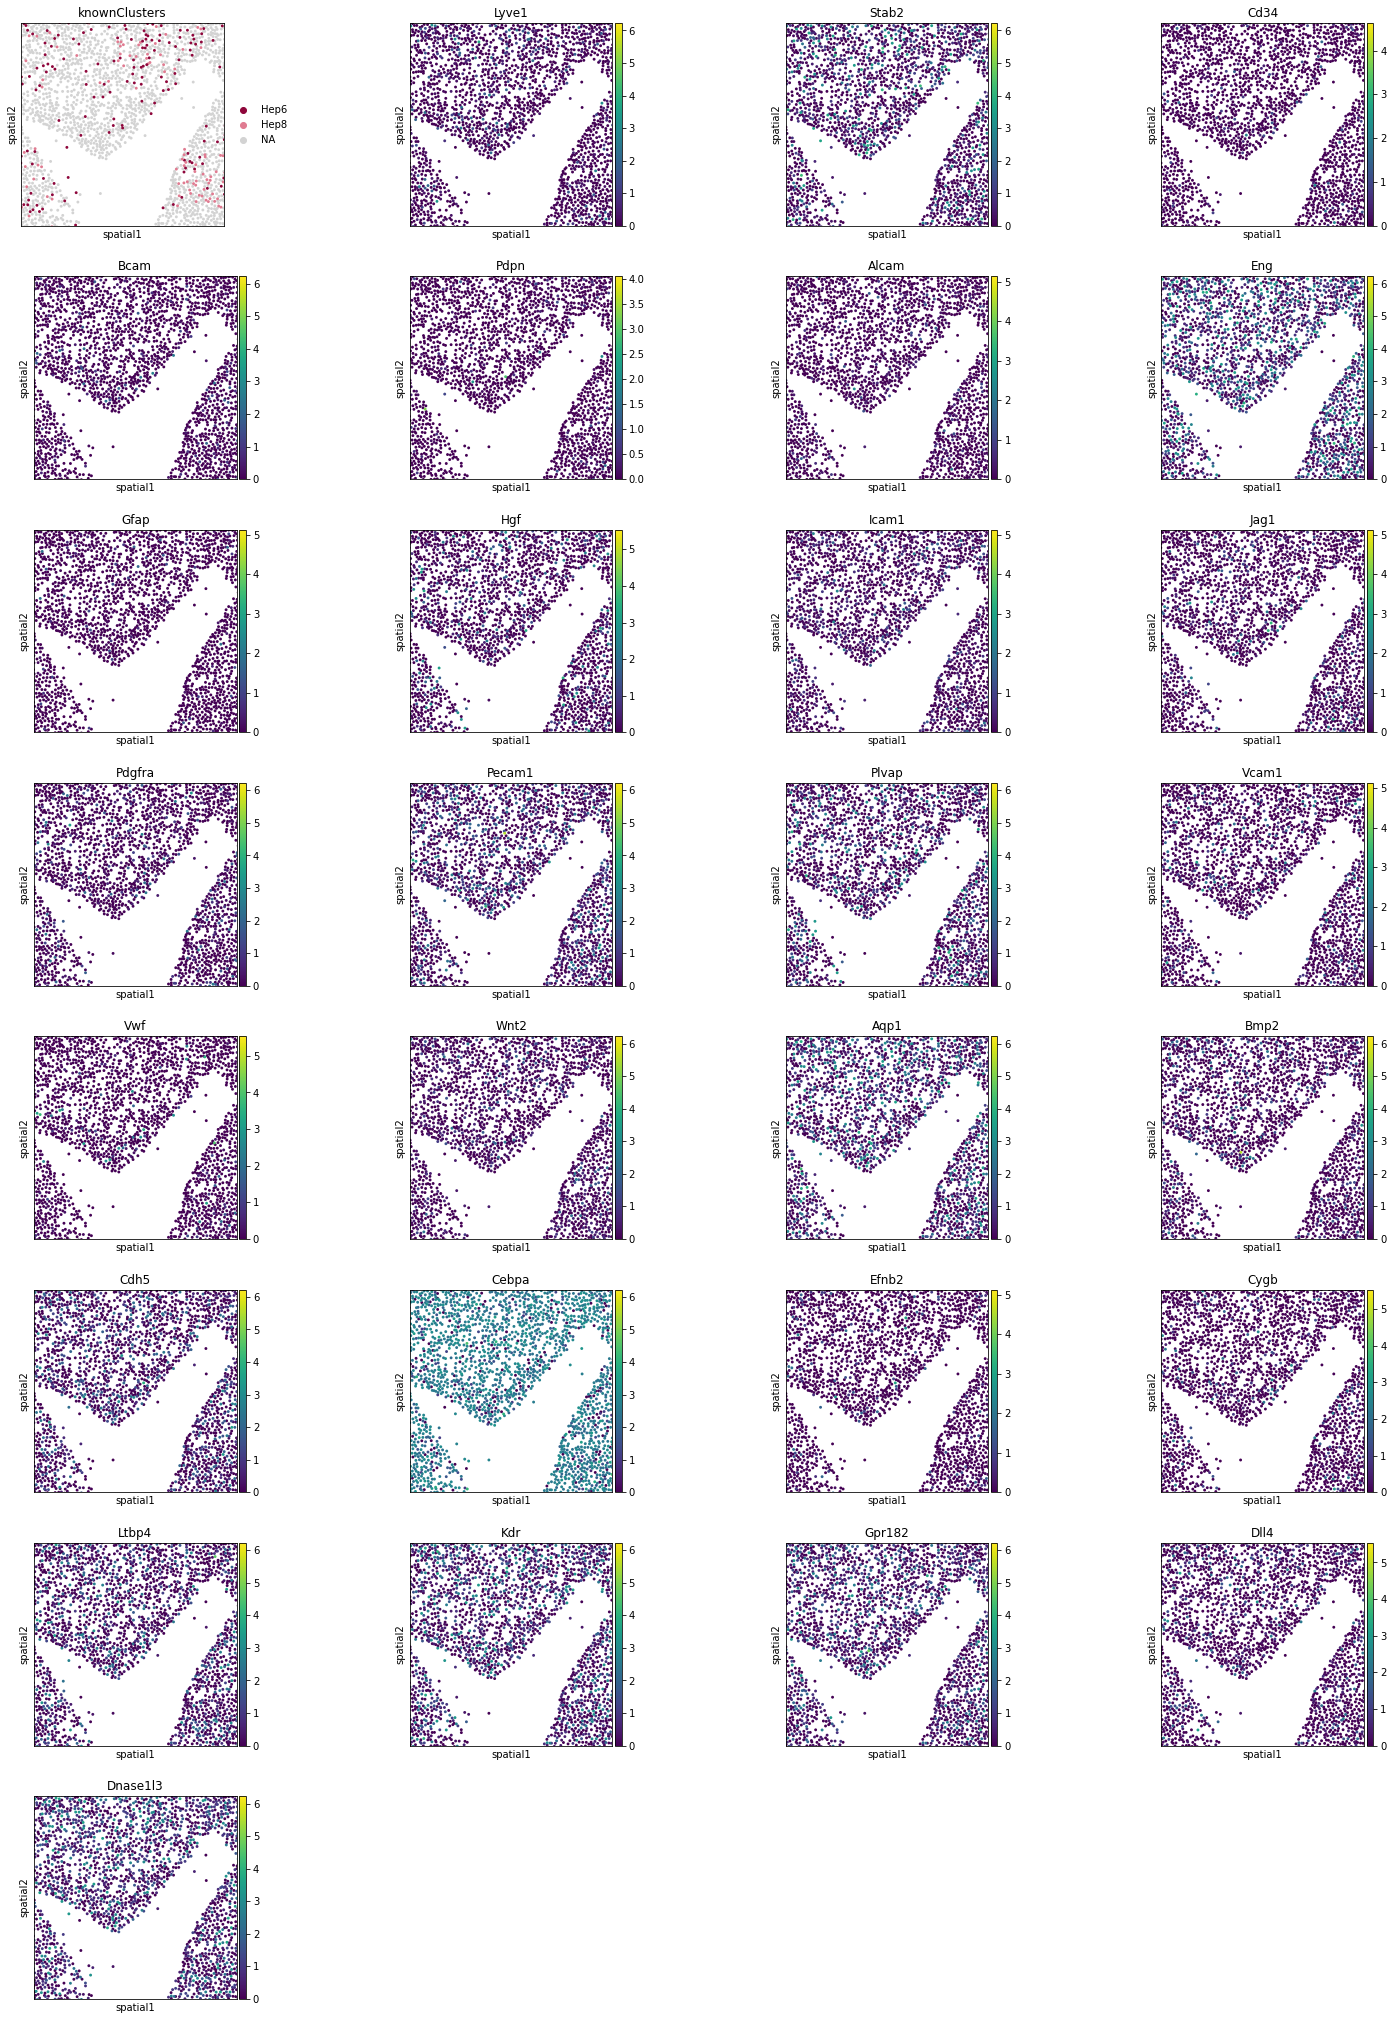

In [54]:
sc.pl.spatial(ad_spatial, basis='spatial',wspace=0.5,color=["knownClusters", gene[0],gene[1],gene[2],gene[3],
gene[4],gene[5],gene[6],gene[7],gene[8],gene[9],gene[10],gene[11],gene[12],gene[13],gene[14],gene[15],
gene[16],gene[17],gene[18],gene[19],gene[20],gene[21],gene[22],gene[23],gene[24],gene[25],gene[26],gene[27]],
                crop_coord=[4300, 5000, 5000, 4300],spot_size=10,groups=celltype)

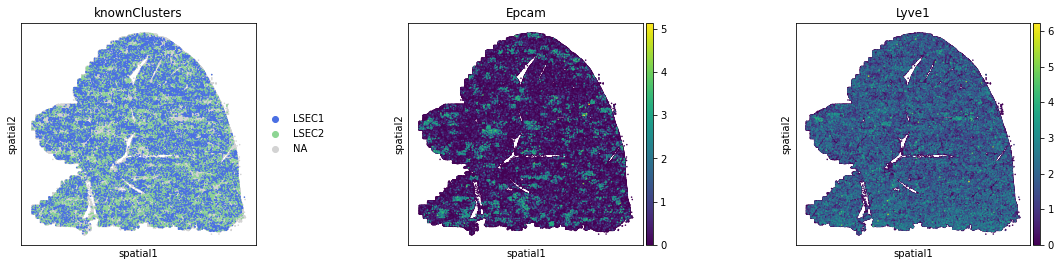

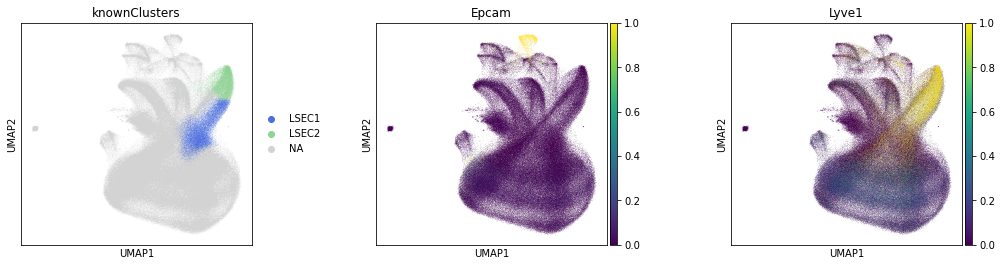

In [30]:
celltype=["LSEC1", "LSEC2"]
gene=["Epcam","Lyve1"]

sc.pl.embedding(ad_spatial, basis='spatial',wspace=0.5,color=["knownClusters",gene[0],gene[1] ],size=10,groups=celltype)
sc.pl.umap(ad_spatial, color=["knownClusters", gene[0],gene[1] ],wspace=0.4,show=True,vmax=1,groups=celltype)